In [1]:
import pandas as pd
import os
import re
from tqdm import tqdm
import ast
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

## Fonctions

In [57]:
def clean_text(text):
    
    text2 = re.sub('!','.',text)
    text2 = re.sub(' \...',' ',text)
    text2 = re.sub('  ',' ',text2)
    char  = [';',':','!','«','»',',','“','”','(',')']
    pattern = '[' + ''.join(char) + ']'
    new_str = re.sub(pattern,'', text2)
    #clean_words = [word for word in new_str.split() if word.lower() not in stopwords_latin]
    #new_str = ' '.join(clean_words)
    new_str = re.sub(r'\? [A-Z]','.',new_str)
    new_str = re.sub(r'\?','',new_str)
    pattern = r"\. ([a-z])"
    new_str = re.sub(pattern, r" \1", new_str)
    string = new_str.split('.')
    string = [x for x in string if x != '']
    string = [x for x in string if x != ' ']
    string = [x.lower() for x in string]
    string = [x.lstrip() for x in string]
    string = [x.rstrip() for x in string]
    string = [re.sub('v','u',x) for x in string]
    string = [re.sub('j','i',x) for x in string]
    
    return string

In [8]:
def clean_text_stopwords(text):
    
    text2 = re.sub('!','.',text)
    text2 = re.sub(' \...',' ',text)
    text2 = re.sub('  ',' ',text2)
    char  = [';',':','!','«','»',',','“','”']
    pattern = '[' + ''.join(char) + ']'
    new_str = re.sub(pattern,'', text2)
    clean_words = [word for word in new_str.split() if word.lower() not in stopwords_latin]
    new_str = ' '.join(clean_words)
    new_str = re.sub(r'\? [A-Z]','.',new_str)
    new_str = re.sub(r'\?','',new_str)
    pattern = r"\. ([a-z])"
    new_str = re.sub(pattern, r" \1", new_str)
    string = new_str.split('.')
    string = [x for x in string if x != '']
    string = [x for x in string if x != ' ']
    string = [x.lower() for x in string]
    string = [x.lstrip() for x in string]
    string = [x.rstrip() for x in string]
    string = [re.sub('v','u',x) for x in string]
    string = [re.sub('j','i',x) for x in string]
    
    return string

In [9]:
def remove_words(sentence, words_to_remove):
    for word in words_to_remove:
        sentence = re.sub(r'\b{}\b'.format(word), '', sentence)
        sentence = re.sub("  "," ",sentence)
    return sentence.strip()


In [10]:
def compare_sentences(sentence_1, sentence_2):
    words_1 = sentence_1.lower().split()
    words_2 = sentence_2.lower().split()

    common_words = set(words_1) & set(words_2)

    return len(common_words) >= 2

In [11]:
def distance_index(text, word1, word2, max_distance=10):
    words = text.split()
    index1 = None
    index2 = None

    for i, word in enumerate(words):
        if word == word1:
            index1 = i
        elif word == word2:
            index2 = i

    if index1 is not None and index2 is not None:
        distance = abs(index2 - index1)
        if distance <= max_distance:
            return True
        else:
            return False
    else:
        return False

In [12]:
def create_bigrams(sentence):
    words = sentence.split()
    bigrams = [(words[i], words[i+1]) for i in range(len(words) - 1)]
    return bigrams

In [13]:
def substitute_keys(dict1, dict2):
    result_dict = {}

    for key1 in dict1.keys():
        
        for value2 in dict2.values():
           
            if value2 == key1:
                
                for key2, value2_2 in dict2.items():
                    if value2_2 == value2:

                        result_dict[key2] = dict1[key1]
                        break  

    return result_dict

In [14]:
def transform_sentences_to_keys(dict1, dict2):
    # Create a new dictionary to store the result
    result_dict = {}

    # Iterate through the keys and sentences in dict1
    for key1, sentences_list1 in dict1.items():
        # Initialize a list to store matching keys from dict2
        keys_list = []
        for sentence1 in sentences_list1:
            # Find the matching key from dict2 for the current sentence1
            for key2, sentence2 in dict2.items():
                if sentence1 == sentence2:
                    keys_list.append(key2)

        # Add the list of keys corresponding to sentences in dict1 to the result_dict
        result_dict[key1] = keys_list

    return result_dict

In [15]:
def from_bigrams_to_sentence(bigram): 

    test = []

    i = 0

    while i <= len(bigram)-1:
        test.append(bigram[i][0])
        i += 1
        
    test.append(bigram[-1][-2])
    test.append(bigram[-1][-1])

    final  = " ".join(test)
    
    return final

In [16]:
def from_trigrams_to_sentence(trigram): 

    test = []

    i = 0

    while i <= len(trigram)-1:
        test.append(trigram[i][0])
        i += 1
    test.append(trigram[-1][-2])
    test.append(trigram[-1][-1])

    final  = " ".join(test)
    
    return final

In [17]:
matches = {}

def comparaison_bi_grams(bigram):   
    #bigram = pdv_bigrams[0]

    liste_vide = []

    for i in bigram:

        for test in guerin_bigrams:

            if i in test:
                liste_vide.append(from_bigrams_to_sentence(test))
                matches[from_bigrams_to_sentence(bigram)] = liste_vide
                
                

In [18]:
def create_trigrams(sentence):
    words = sentence.split()
    trigrams = [(words[i], words[i+1], words[i+2]) for i in range(len(words) - 2)]
    return trigrams

In [19]:
matches_trigrams = {}

def comparaison_trigrams(trigram):   
    #bigram = pdv_bigrams[0]

    liste_vide = []

    for i in trigram:

        for test in guerin_trigrams:

            if i in test:
                liste_vide.append(from_trigrams_to_sentence(test))
                matches_trigrams[from_trigrams_to_sentence(trigram)] = liste_vide
                
                

In [20]:
def remove_duplicates_from_dict_values(dictionary):
    for key, value_list in dictionary.items():
        # Convert the value list to a set to remove duplicates, then back to a list
        dictionary[key] = list(set(value_list))
    return dictionary

In [21]:
def create_quadrigrams(sentence):
    words = sentence.split()
    quadrigrams = [(words[i], words[i+1], words[i+2], words[i+3]) for i in range(len(words) - 3)]
    return quadrigrams

In [22]:
def from_quadrigrams_to_sentence(quadrigram): 

    test = []

    i = 0

    while i <= len(quadrigram)-1:
        test.append(quadrigram[i][0])
        i += 1
    
    test.append(quadrigram[-1][-3])
    test.append(quadrigram[-1][-2])
    test.append(quadrigram[-1][-1])

    final  = " ".join(test)
    
    return final

In [23]:
matches_quadrigrams = {}

def comparaison_quadrigrams(quadrigram):   
    #bigram = pdv_bigrams[0]

    liste_vide = []

    for i in quadrigram:

        for test in guerin_quadrigrams:

            if i in test:
                liste_vide.append(from_quadrigrams_to_sentence(test))
                matches_quadrigrams[from_quadrigrams_to_sentence(quadrigram)] = liste_vide
                
                

In [24]:
def create_quintigrams(sentence):
    words = sentence.split()
    quintigrams = [(words[i], words[i+1], words[i+2], words[i+3], words[i+4]) for i in range(len(words) - 4)]
    return quintigrams

In [25]:
def from_quintigrams_to_sentence(quintigram): 

    test = []

    i = 0

    while i <= len(quintigram)-1:
        test.append(quintigram[i][0])
        i += 1
    
    test.append(quintigram[-1][-4])
    test.append(quintigram[-1][-3])
    test.append(quintigram[-1][-2])
    test.append(quintigram[-1][-1])

    final  = " ".join(test)
    
    return final

In [26]:
matches_quintigrams = {}

def comparaison_quintigrams(quintigram):   
    #bigram = pdv_bigrams[0]

    liste_vide = []

    for i in quintigram:

        for test in guerin_quintigrams:

            if i in test:
                liste_vide.append(from_quintigrams_to_sentence(test))
                matches_quintigrams[from_quintigrams_to_sentence(quintigram)] = liste_vide
                
                

In [2]:
file = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/PDV_grams.xlsx'
guerin = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/Guerin_grams.xlsx'

In [28]:
os.chdir('/home/noe/Documents/2022-2023/ENC/Mémoire/Comparaison_de_mots/')

In [3]:
df_PDV = pd.read_excel(file)

In [15]:
df_PDV = df_PDV[['Livre', 'Numéro de la charte','Titre','Date','textes']]
df_PDV.head(20)

,Livre,Numéro de la charte,Titre,Date,textes
0,Livre 1,1,"Querimonia Friderici imperatoris, super deposi...",1240,Collegerunt pontifices et Pharisei consilium i...
1,Livre 1,2,"Fridericus regibus et principibus mundi, ut no...",1246,"Illos felices describit antiquitas, quibus ex ..."
2,Livre 1,3,"Fridericus Regi Franciae, super sententia depo...",1245,"Etsi causae nostrae iustitiam, uulgaris famae ..."
3,Livre 1,4,Fridericus magistro iustitiario regni Syciliae...,1247,Ne per excogitatae malignitatis astutiam iste ...
4,Livre 1,5,Fridericus regi Franciae significat aliqua fac...,1243,"Virum industrium et illustrem R., comitem Thol..."
5,Livre 1,6,"Fridericus cardinalibus, super sententia excom...",1239,Cum sit Christus caput Ecclesiae et in Petri u...
6,Livre 1,7,Fridericus regi Franciae significat aliqua fac...,1239,"Virum industrium et illustrem R., comitem Thol..."
7,Livre 1,8,"Comitibus, principibus et aliis nobilibus, sup...",1241,"Adauctae nobis continue felicitatis auspicia, ..."
8,Livre 1,9,Item super eadem captione prelatorum et etiam ...,1241,Cum ad depopulationem uicinae urbis Bononiae n...
9,Livre 1,10,"lustitiario Terrae Laboris, super depositione ...",1245,"Hucusque satis, ut loquamur ad litteram, pacem..."


In [30]:
stopwords_latin = ['©','quod','et','a', 'ab', 'ac', 'ad', 'adhic', 'aliqua', 'aliquae', 'aliquam', 'aliqui', 'aliquis', 'an', 'ante', 'apud', 'at', 'atque', 'aut', 'autem', 'cetera', 'ceterae', 'ceteri', 'ceteris', 'cetero', 'ceterorum', 'ceteros', 'ceterum', 'ceterus', 'cum', 'cur', 'de', 'deinde', 'dum', 'ea', 'eae', 'eam', 'earum', 'eas', 'eis', 'eo', 'eorum', 'eos', 'eum', 'eundem', 'eumdem', 'ex', 'fio', 'haec', 'hanc', 'hic', 'hoc', 'huc', 'iam', 'idem', 'igitur', 'ii', 'iis', 'ille', 'illius', 'in', 'infra', 'inter', 'interim', 'ipse', 'ipsa', 'ipsam', 'ipsis', 'ipsius', 'ipsorum', 'ipsos', 'ita', 'magis', 'modo', 'mox', 'nam', 'ne', 'nec', 'necne', 'necque', 'neque', 'nisi', 'non', 'nos', 'nostra', 'nostrae', 'nostram', 'nostri', 'nostris', 'notre', 'o', 'ob', 'per', 'possum', 'post', 'pro', 'quae', 'quam', 'quare', 'qui', 'quia', 'quibus', 'quid', 'quidem', 'quin', 'quis', 'quisnam', 'quisquam', 'quisque', 'quo', 'quoniam', 'sed', 'si', 'sibi', 'sic', 'sicut', 'sine', 'sive', 'sub', 'sua', 'suam', 'sui', 'suis', 'sum', 'super', 'supra', 'suus', 'tam', 'tamen', 'trans', 'tu', 'tua', 'tunc', 'tuo', 'tuos', 'tuus', 'ubi', 'uel', 'uelut', 'uero', 'unus', 'ut']

# Ajout des déterminants de la liste précédente
stopwords_latin += ['mei', 'tui', 'sui', 'nostri', 'vestri', 'suus', 'meus', 'tuus', 'noster', 'vester', 'eius', 'eae', 'ea', 'eum', 'eam', 'eos', 'eas', 'id', 'is', 'illa', 'illud', 'illi', 'illis', 'ipsum', 'ipsam', 'ipsa', 'ipsi', 'ipsis', 'idem', 'eadem', 'idemque', 'eademque']


In [48]:
df = pd.DataFrame({'texts':df_PDV['textes'],'clean_PDV': df_PDV['textes'].apply(clean_text)})

,texts,clean_PDV
0,Collegerunt pontifices et Pharisei consilium i...,[collegerunt pontifices et pharisei consilium ...
1,"Illos felices describit antiquitas, quibus ex ...",[illos felices describit antiquitas quibus ex ...
2,"Etsi causae nostrae iustitiam, uulgaris famae ...",[etsi causae nostrae iustitiam uulgaris famae ...
3,Ne per excogitatae malignitatis astutiam iste ...,[ne per excogitatae malignitatis astutiam iste...
4,"Virum industrium et illustrem R., comitem Thol...",[uirum industrium et illustrem r comitem tholo...
...,...,...
358,Fauorabilis petitio supplicantium effectu debe...,[fauorabilis petitio supplicantium effectu deb...
359,"Tenore presentium notum facimus uniuersis, quo...",[tenore presentium notum facimus uniuersis quo...
360,Ad hoc summi dispensatione consilii principali...,[ad hoc summi dispensatione consilii principal...
361,"Consueuit innata benignitas, consuetudo regnan...",[consueuit innata benignitas consuetudo regnan...


In [32]:
df_guerin = pd.read_excel(guerin)

In [83]:
pdv = {}
for i in range(len(df)):
    for sentence in df['clean_PDV'][i]:
        pdv[f'pdv_{i+1}_{df["clean_PDV"][i].index(sentence)+1}'] = sentence

In [84]:
pdv

{'pdv_1_1': 'collegerunt pontifices et pharisei consilium in unum et aduersus principem christianum dominum conuenerunt',
 'pdv_1_2': 'quid facimus inquiunt quia hic homo de hostibus sic triumphat si sic ipsum dimittimus omnem sibi subiciet gloriam lombardorum et more cesareo ueniens non tardabit ut posse nobis et locum auferat et destruat gentem nostram',
 'pdv_1_3': 'uineam autem domini sabaoth aliis locabit agricolis et bonos absque iudicio male perdet',
 'pdv_1_4': 'obstemus ergo principiis ne forte scintilla tenuis in flammam transeat destructiuam et morbus quidem sic fistulare incipiens non abscissus perueniat in medullas',
 'pdv_1_5': 'sepe enim uix ferus ignis extinguitur et morbo cronico salubris sero parabitur medicina',
 'pdv_1_6': 'nullos igitur huiusmodi sermones principis attendentes percutiamus aiunt acriter ipsum lingua nec sagitta nostra plus lateat sed procedat sic procedat quod feriat sic feriat quod ledat sic ledatur ut iaceat sic prosternatur quod amplius non resur

In [54]:
pdv_word = {}
for i in range(len(df)):
    for sentence in df['texts'][i]:
        pdv_word[ f'pdv_{i+1}_{df["texts"][i].index(sentence)+1}'] = sentence

In [34]:
df2 = pd.DataFrame({'guerin_texts':df_guerin['text'],'clean_guerin':df_guerin['text'].apply(clean_text),
                   'guerin_stop': df_guerin['text'].apply(clean_text_stopwords)})

In [35]:
df2['guerin_stop'][0] 

['philippus uniuersis cordi habentes condecet inimicorum nequicias impulsus totis conatibus repellendo quietem pacem regni fidelium incolarum eiusdem auxiliante deo precipue mediante subditorum subsidio procurare prouidere mercatores alii subditi mercaturis negociis aliis impediri ualeant uel exponere se periculis quibuscunque notum facimus licet personaliter intendere proponamus cucum uiis modis pluribus exquisitis finaliter deliberato cumcum peritis talibus etet quamplurimum famosis consilio certam procedendi uiam supper prouidimus utilem salubrem dilectis fidelibus s',
 'ruppe choardi i',
 'uigeri militibus quos pictauensem mittimus senescalliam apperuimus uel alterum senescallo eiusdem senescallie expedire uiderint declarandam uidelicet ueniendo uobis facto uerisimiliter omnes tangit certo numero seruientum armorum uadia seu stipendia ditorum secundum uires facultates eorumdem certum tempus prout duxerint considerato negocio statuendo',
 'dantes omnibus subditis presentibus mandati

In [36]:
column_without_brackets = [[string.replace('[', '').replace(']', '').lstrip().rstrip() for string in sublist] for sublist in df2['clean_guerin']]

In [37]:
df2['clean'] = column_without_brackets

In [38]:
guerin = {}
for i in range(len(df2)):
    for sentence in df2['clean'][i]:        
        guerin[f'guerin_{i+1}_{df2["clean"][i].index(sentence)+1}'] = sentence

In [39]:
viard = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/Viard_grams.xlsx'
df_viard = pd.read_excel(viard)

In [40]:
df3 = pd.DataFrame({'clean_viard':df_viard['text'].apply(clean_text)})

In [41]:
viard = {}

for i in range(len(df3)):
    for sentence in df3['clean_viard'][i]:
        viard[f'viard_{i+1}_{df3["clean_viard"][i].index(sentence)+1}'] = sentence

In [42]:
pdv_2 = {key: remove_words(value,stopwords_latin) for key, value in pdv.items()}
guerin_2 = {key: remove_words(value,stopwords_latin) for key, value in guerin.items()}

In [65]:
pdv_words = pd.DataFrame(pdv_2,index=[0])
pdv_words = pdv_words.transpose().reset_index()

In [75]:
df['clean_PDV'][0][10]

'sed qui christi uicarius diceris et petri successor etiam piscatoris cur accensus furore refugis id pro quo rex omnium induit formam serui'

In [78]:
pdv_words[0]

'iste pater patrum dicitur seruus seruorum dei omni prorsus exclusa iustitia factus est aspis surda admittens romani principis allegata lapis funda iacitur emisit subito uerbum malum omnino reiciens perturbatione consilium scripsi scripsi uociferans respuit uiam pacis'

In [81]:
df['clean_PDV'][0]

'iste pater patrum qui dicitur seruus seruorum dei omni prorsus exclusa iustitia factus est aspis surda non admittens romani principis allegata et uelut lapis qui de funda iacitur sic emisit subito uerbum malum ac uelut omnino reiciens in perturbatione consilium quod scripsi scripsi uociferans respuit uiam pacis'

In [38]:
df['pdv_stop'] = df['clean_PDV'].apply(lambda x: [remove_words(sentence, stopwords_latin) for sentence in x])
df2['guerin_stop'] = df2['clean_guerin'].apply(lambda x: [remove_words(sentence, stopwords_latin) for sentence in x])
df3['viard_stop'] = df3['clean_viard'].apply(lambda x: [remove_words(sentence, stopwords_latin) for sentence in x])

In [39]:
resultat = {}
for key,value in tqdm(pdv_2.items()):
    liste = []
    for clé, valeur in guerin_2.items():
        liste.append(compare_sentences(value,valeur))
    resultat[key] = liste

100%|███████████████████████████████████████| 2074/2074 [00:45<00:00, 45.32it/s]


In [40]:
dataframe = pd.DataFrame(resultat)

In [41]:
identifiant = list(guerin_2.keys())

In [42]:
dataframe = dataframe.set_index(pd.Index(identifiant))
dataframe = dataframe.transpose()

In [43]:
df_filtered = dataframe[~(dataframe == False).all(axis=1)]

Les dictionnaires importants c'est pdv_2 et guerin_2. Dedans ils ont les phrases nettoyées, sans les stop_words. C'est grâce à eux que les comparaisons ont été faites. On regarde si les textes sans les stopwords ont au moins 2 mots en commun. Si c'est le cas, on garde les phrases. 

In [44]:
first_row = df_filtered.iloc[[10]]
filtered_df = first_row.loc[:, first_row.iloc[0]]
filtered_df.index[0]

'pdv_1_13'

In [45]:
phrases = {}
for i in range(len(df_filtered)):
    row = df_filtered.iloc[[i]]
    filtered = row.loc[:, row.iloc[0]]
    phrases[filtered.index[0]] = filtered.columns.tolist()

In [46]:
sentence1 = pdv_2['pdv_1_1']
sentence1

'collegerunt pontifices pharisei consilium unum aduersus principem christianum dominum conuenerunt'

In [47]:
sentence2 = guerin_2['guerin_294_4']
sentence2

'eciam opponebatur contra delatum minus iuste commisit crimen falsi faciendo scribendo manu propria quoddam protocollum cuiusdam littere quictancie guillelmum ferron clericum passate domino torcio guillelmum poillé ualetum cuiusdam littere obligatorie dictus delatus habebat contra dictum dominum thorcio sex centum florenis auri eciam opponebatur contra dictum delatum minus iuste indebite quamdam litteram falsam fecerat scripserat consignauerat certis contractibus conuencionibus dudum factis iohannem durablea clericum parte una iohannem theobaldi parrochianum beate marie fontiniaco altera dictis litteris multas clausulas obiectiones uiciose speciem falsitatis posuerat ultra materiam contractuum conuencionum huiusmodi dictus delatus contraxerat confecerat signauerat litteram antedictam magnum preiudicium dicti durablea premissa crimen falsi alias iuris penas dampnabiliter incurrendo sigillo uenerabilis discreti uiri decani fontiniaci predictus clericus delatus premissa facienda consilium

In [48]:
words1 = set(sentence1.split())
words2 = set(sentence2.split())

In [49]:
common_words = words1.intersection(words2)
common_words_list = list(common_words)
common_words_list

['dominum', 'consilium']

In [50]:
first = df_filtered[df_filtered.index.str.startswith('pdv_1_')]

In [51]:
i= 1
filtered_dict = {key: value for key, value in phrases.items() if key.startswith(f"pdv_{1}_")}


In [52]:
mixed_dict = {}
for pdv_index, guerin_indexes in filtered_dict.items():
    pdv_sentence = pdv_2.get(pdv_index)
    if pdv_sentence is not None:
        guerin_sentences = [guerin_2.get(guerin_index) for guerin_index in guerin_indexes]
        mixed_dict[pdv_sentence] = guerin_sentences

In [53]:
new_dict = {}
for key in list(mixed_dict.keys()):
    for value in mixed_dict.get(key):
        
        common = []
        list_values = []
        
        words1 = key.split()
        words2 = value.split()
        
        for word in words1:
            if word in words2:
                common.append(word)
        if len(common)==2:
            x = distance_index(key,common[0],common[1],max_distance=1)
        if x == True:
            list_values.append(value)
    
    new_dict[key] = list_values
new_dict = {key: value for key, value in new_dict.items() if value}

In [54]:
bigrams = {}

for i in tqdm(range(363)):
    filtered_dict = {key: value for key, value in phrases.items() if key.startswith(f"pdv_{i+1}_")}
    
    mixed_dict = {}
    for pdv_index, guerin_indexes in filtered_dict.items():
        pdv_sentence = pdv_2.get(pdv_index)
        if pdv_sentence is not None:
            guerin_sentences = [guerin_2.get(guerin_index) for guerin_index in guerin_indexes]
            mixed_dict[pdv_sentence] = guerin_sentences
            
    new_dict = {}
    for key in list(mixed_dict.keys()):
        for value in mixed_dict.get(key):

            common = []
            list_values = []

            words1 = key.split()
            words2 = value.split()

            for word in words1:
                if word in words2:
                    common.append(word)
            if len(common)==2:
                x = distance_index(key,common[0],common[1],max_distance=1)
            if x == True:
                list_values.append(value)

        new_dict[key] = list_values
    new_dict = {key: value for key, value in new_dict.items() if value}
    
    bigrams.update(new_dict)

100%|█████████████████████████████████████████| 363/363 [00:13<00:00, 26.41it/s]


In [55]:
indices = []
for i in list(bigrams.keys()):
    cle = [key for key in pdv_2 if pdv_2.get(key) == i]
    indices.append(cle)

In [56]:
print(list(bigrams.keys())[1], ' = ', list(bigrams.values())[1][0])

sepe enim uix ferus ignis extinguitur morbo cronico salubris sero parabitur medicina  =  dictus perrotus chabesson diffugiebat dictus nicolaus accessisset quandam cauernam speluncam caueam dicebatur dictum perrotum quibusdam aliis complicibus latitasse ibidem foramen dicte spelunce cauee precepisset dicto petro parte dicti senescalli uirtute dicti mandati predictum senescallum facti exiret se prisionarium redderet liberando dicto iohanne existente obside dicto perroto prefertur preceptum sepe sepius instanter fecisset nullo ibidem eidem nicolao respondente assumptis secum nonnullis sociis ui armata prout suo officio incombebat dictam caueam intrare dictum foramen uoluisset plures persone dicta fouea existentes godendardis gladiis fustibus ensibus alias uim introitu deffenderent eidem nicolao inobediendo quamobrem preceptis supradictis reiteratis presertim dictus perrotus inde exirent quem eciam uocari predictum iohannem bodeti suum socium fecisset facere denegantibus renuentibus dictus

In [57]:
words1 = list(bigrams.keys())[1].split()
words2 = list(bigrams.values())[1][0].split()

common = []

for word in words1:
    if word in words2:
        common.append(word)
common

['sepe', 'ignis', 'sero']

In [58]:
i= 2
filtered_dict = {key: value for key, value in phrases.items() if key.startswith(f"pdv_{i}_")}
mixed_dict = {}
for pdv_index, guerin_indexes in filtered_dict.items():
    pdv_sentence = pdv_2.get(pdv_index)
    if pdv_sentence is not None:
        guerin_sentences = [guerin_2.get(guerin_index) for guerin_index in guerin_indexes]
        mixed_dict[pdv_sentence] = guerin_sentences

In [59]:
test = {}
for clé, valeur in list(mixed_dict.items()):
    
    x = create_bigrams(clé)
    
    guerin = []
    
    for sentence in valeur:
        y = create_bigrams(sentence)
        for i in x:
            if i in y:
                guerin.append(sentence)
                break
    test[clé] = guerin

In [60]:
new_dict = {key: value for key, value in test.items() if value}

In [61]:
grams = {}

for i in tqdm(range(363)):
    filtered_dict = {key: value for key, value in phrases.items() if key.startswith(f"pdv_{i+1}_")}
    
    mixed_dict = {}
    for pdv_index, guerin_indexes in filtered_dict.items():
        pdv_sentence = pdv_2.get(pdv_index)
        if pdv_sentence is not None:
            guerin_sentences = [guerin_2.get(guerin_index) for guerin_index in guerin_indexes]
            mixed_dict[pdv_sentence] = guerin_sentences
    test = {}
    for clé, valeur in list(mixed_dict.items()):

        x = create_bigrams(clé)

        guerin = []

        for sentence in valeur:
            y = create_bigrams(sentence)
            for i in x:
                if i in y:
                    guerin.append(sentence)
                    break
        test[clé] = guerin
    new_dict = {key: value for key, value in test.items() if value}
    grams.update(new_dict)

100%|█████████████████████████████████████████| 363/363 [00:20<00:00, 17.54it/s]


In [62]:
indice_pdv_sentence_guerin = substitute_keys(grams,pdv_2)

In [63]:
indices_pdv_guerin = transform_sentences_to_keys(indice_pdv_sentence_guerin,guerin_2)
indices_pdv_guerin = remove_duplicates_from_dict_values(indices_pdv_guerin)

In [64]:
count = {}

for key, value in indices_pdv_guerin.items():
    count[key] = len(value)

In [65]:
count_sentences = {}
#nombre de phrases qui ont au moins un bigramme similaire avec une phrase de guérin. 

for i in tqdm(range(363)):
    filtered_dict = {key: value for key, value in count.items() if key.startswith(f"pdv_{i+1}_")}
    count_sentences[f'pdv_{i+1}'] = sum(filtered_dict.values())

100%|███████████████████████████████████████| 363/363 [00:00<00:00, 5325.53it/s]


In [66]:
keys = list(count_sentences.keys())
values = list(count_sentences.values())

livre_1 = {}
livre_2 = {}
livre_3 = {}
livre_4 = {}
livre_5 = {}
livre_6 = {}

for i in range(len(keys)):
    if i < 33:
        livre_1[keys[i]] = values[i]
    if 32 < i < 92:
        livre_2[keys[i]] = values[i]
    if 91 < i < 179:
        livre_3[keys[i]] = values[i]
    if 178 < i < 195:
        livre_4[keys[i]] = values[i]
    if 194 < i < 331:
        livre_5[keys[i]] = values[i]
    if 330 < i < 364:
        livre_6[keys[i]] = values[i]

In [67]:
livre1 = pd.DataFrame(list(livre_1.items()), columns=['Key', 'Value'])
statistics1 = pd.DataFrame(livre1['Value'].describe())

livre2 = pd.DataFrame(list(livre_2.items()), columns=['Key', 'Value'])
statistics2 = pd.DataFrame(livre2['Value'].describe())

livre3 = pd.DataFrame(list(livre_3.items()), columns=['Key', 'Value'])
statistics3 = pd.DataFrame(livre3['Value'].describe())

livre4 = pd.DataFrame(list(livre_4.items()), columns=['Key', 'Value'])
statistics4 = pd.DataFrame(livre4['Value'].describe())

livre5 = pd.DataFrame(list(livre_5.items()), columns=['Key', 'Value'])
statistics5 = pd.DataFrame(livre5['Value'].describe())

livre6 = pd.DataFrame(list(livre_6.items()), columns=['Key', 'Value'])
statistics6 = pd.DataFrame(livre6['Value'].describe())

In [68]:
livre1_array = np.array(livre1['Value'].tolist())
livre2_array = np.array(livre2['Value'].tolist())
livre3_array = np.array(livre3['Value'].tolist())
livre4_array = np.array(livre4['Value'].tolist())
livre5_array = np.array(livre5['Value'].tolist())
livre6_array = np.array(livre6['Value'].tolist())
list_livre = [livre1_array,livre2_array,livre3_array,livre4_array,livre5_array,livre6_array]

Text(0.5, 1.0, 'Nombre de phrases de Guérin dans lesquelles on retrouve au moins un bigram en commun avec Pierre de la Vigne')

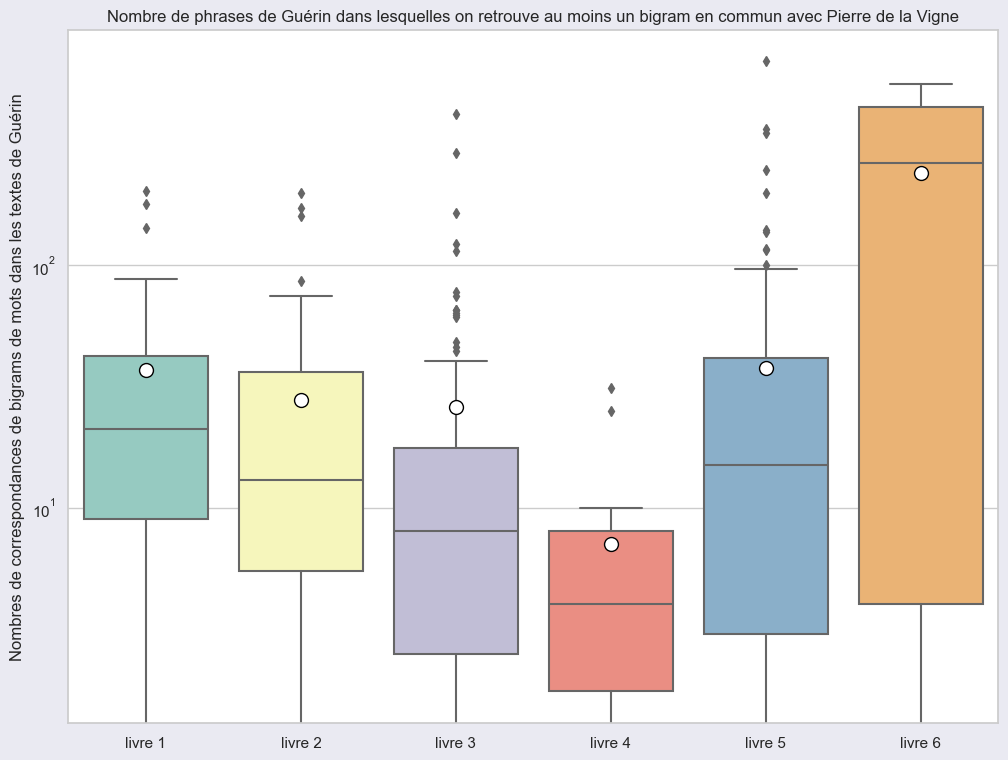

In [72]:
sns.set(style="whitegrid")
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(12, 9), facecolor=facecolor)
sns.boxplot(data=list_livre, palette="Set3",showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.yscale("log")
ax.set_ylabel('Nombres de correspondances de bigrams de mots dans les textes de Guérin', 
              fontsize=12)
custom_labels = ['livre 1','livre 2','livre 3','livre 4','livre 5','livre 6']
plt.xticks(range(len(custom_labels)), custom_labels)
plt.title('Nombre de phrases de Guérin dans lesquelles on retrouve au moins un bigram en commun avec Pierre de la Vigne')

In [73]:
liste_bigrams = [sum(livre_1.values()),sum(livre_2.values()),sum(livre_3.values()),
                     sum(livre_4.values()),sum(livre_5.values()),sum(livre_6.values())]

In [74]:
liste_bigrams

[1214, 1641, 2260, 113, 5100, 7645]

Essai d'une deuxième méthode pour vérifier que les bigrams ça marche.

In [75]:
guerin_bigrams = []

for i in list(guerin_2.values()):
    guerin_bigrams.append(create_bigrams(i))

In [76]:
pdv_bigrams = []

for i in list(pdv_2.values()):
    pdv_bigrams.append(create_bigrams(i))

In [77]:
matches = {}

bigrams = pdv_bigrams[0]

liste_vide = []

for i in bigrams:

    for test in guerin_bigrams:
        
        if i in test:
            liste_vide.append(from_bigrams_to_sentence(test))
            matches[from_bigrams_to_sentence(bigrams)] = liste_vide

In [78]:
for value in tqdm(pdv_bigrams):
    
    comparaison_bi_grams(value)

100%|███████████████████████████████████████| 2074/2074 [02:09<00:00, 15.97it/s]


In [79]:
un = substitute_keys(matches,pdv_2)

In [80]:
deux = transform_sentences_to_keys(un,guerin_2)
deux = remove_duplicates_from_dict_values(deux)

In [81]:
count_2 = {}

for key, value in deux.items():
    count_2[key] = len(value)

In [82]:
count_sentences_2 = {}
#nombre de phrases qui ont au moins un bigramme similaire avec une phrase de guérin. 

for i in tqdm(range(363)):
    filtered_dict = {key: value for key, value in count.items() if key.startswith(f"pdv_{i+1}_")}
    count_sentences_2[f'pdv_{i+1}'] = sum(filtered_dict.values())

100%|███████████████████████████████████████| 363/363 [00:00<00:00, 5265.78it/s]


trigrams

In [83]:
x = create_trigrams(list(pdv_2.values())[0])

In [84]:
guerin_trigrams = []

for i in list(guerin_2.values()):
    guerin_trigrams.append(create_trigrams(i))

In [85]:
pdv_trigrams = []

for i in list(pdv_2.values()):
    pdv_trigrams.append(create_trigrams(i))

In [86]:
for value in tqdm(pdv_trigrams):
    
    comparaison_trigrams(value)

100%|███████████████████████████████████████| 2074/2074 [01:59<00:00, 17.39it/s]


In [87]:
len(matches_trigrams)

80

In [88]:
un =  substitute_keys(matches_trigrams,pdv_2)

In [89]:
deux = transform_sentences_to_keys(un,guerin_2)
deux = remove_duplicates_from_dict_values(deux)

In [90]:
count_trigrams = {}

for key, value in deux.items():
    count_trigrams[key] = len(value)

In [91]:
count_sentences_trigrams = {}
#nombre de phrases qui ont au moins un bigramme similaire avec une phrase de guérin. 

for i in tqdm(range(363)):
    filtered_dict = {key: value for key, value in count_trigrams.items() if key.startswith(f"pdv_{i+1}_")}
    count_sentences_trigrams[f'pdv_{i+1}'] = sum(filtered_dict.values())

100%|██████████████████████████████████████| 363/363 [00:00<00:00, 71550.94it/s]


In [92]:
keys = list(count_sentences_trigrams.keys())
values = list(count_sentences_trigrams.values())

livre_1 = {}
livre_2 = {}
livre_3 = {}
livre_4 = {}
livre_5 = {}
livre_6 = {}

for i in range(len(keys)):
    if i < 33:
        livre_1[keys[i]] = values[i]
    if 32 < i < 92:
        livre_2[keys[i]] = values[i]
    if 91 < i < 179:
        livre_3[keys[i]] = values[i]
    if 178 < i < 195:
        livre_4[keys[i]] = values[i]
    if 194 < i < 331:
        livre_5[keys[i]] = values[i]
    if 330 < i < 364:
        livre_6[keys[i]] = values[i]

In [93]:
livre1 = pd.DataFrame(list(livre_1.items()), columns=['Key', 'Value'])
statistics1 = pd.DataFrame(livre1['Value'].describe())

livre2 = pd.DataFrame(list(livre_2.items()), columns=['Key', 'Value'])
statistics2 = pd.DataFrame(livre2['Value'].describe())

livre3 = pd.DataFrame(list(livre_3.items()), columns=['Key', 'Value'])
statistics3 = pd.DataFrame(livre3['Value'].describe())

livre4 = pd.DataFrame(list(livre_4.items()), columns=['Key', 'Value'])
statistics4 = pd.DataFrame(livre4['Value'].describe())

livre5 = pd.DataFrame(list(livre_5.items()), columns=['Key', 'Value'])
statistics5 = pd.DataFrame(livre5['Value'].describe())

livre6 = pd.DataFrame(list(livre_6.items()), columns=['Key', 'Value'])
statistics6 = pd.DataFrame(livre6['Value'].describe())

In [94]:
livre1_array = np.array(livre1['Value'].tolist())
livre2_array = np.array(livre2['Value'].tolist())
livre3_array = np.array(livre3['Value'].tolist())
livre4_array = np.array(livre4['Value'].tolist())
livre5_array = np.array(livre5['Value'].tolist())
livre6_array = np.array(livre6['Value'].tolist())
list_livre = [livre1_array,livre2_array,livre3_array,livre4_array,livre5_array,livre6_array]

NameError: name 'font_color' is not defined

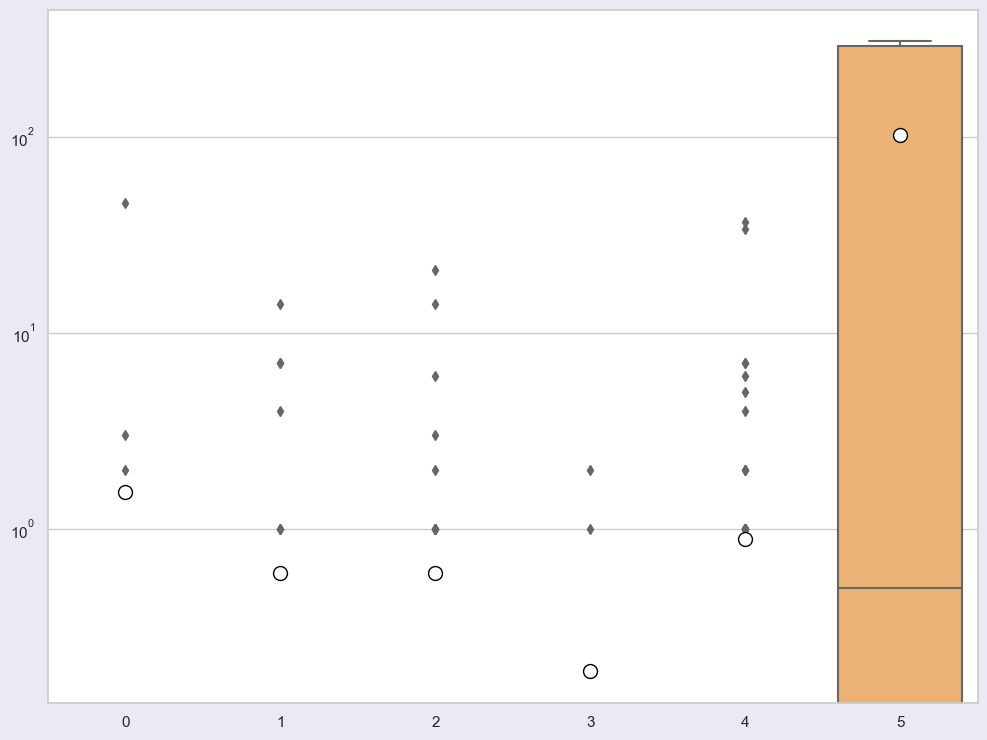

In [95]:
sns.set(style="whitegrid")
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(12, 9), facecolor=facecolor)
sns.boxplot(data=list_livre, palette="Set3",showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.yscale("log")
ax.set_ylabel('Nombres de correspondances de bigrams de mots dans les textes de Guérin', 
              fontsize=12, color=font_color, **hfont)
custom_labels = ['livre 1','livre 2','livre 3','livre 4','livre 5','livre 6']
plt.xticks(range(len(custom_labels)), custom_labels)
plt.title('Nombre de phrases de Guérin dans lesquelles on retrouve au moins un bigram en commun avec Pierre de la Vigne')

In [96]:
liste_trigrams = [sum(livre_1.values()),sum(livre_2.values()),sum(livre_3.values()),
                     sum(livre_4.values()),sum(livre_5.values()),sum(livre_6.values())]

In [97]:
liste_trigrams

[51, 35, 52, 3, 121, 3296]

quadrigrams

In [98]:
x = create_quadrigrams(list(pdv_2.values())[0])

In [99]:
guerin_quadrigrams = []

for i in list(guerin_2.values()):
    guerin_quadrigrams.append(create_quadrigrams(i))

In [100]:
pdv_quadrigrams = []

for i in list(pdv_2.values()):
    pdv_quadrigrams.append(create_quadrigrams(i))

In [102]:
for value in tqdm(pdv_quadrigrams):
    
    comparaison_quadrigrams(value)

100%|███████████████████████████████████████| 2074/2074 [01:55<00:00, 17.96it/s]


In [103]:
un =  substitute_keys(matches_quadrigrams,pdv_2)
deux = transform_sentences_to_keys(un,guerin_2)
deux = remove_duplicates_from_dict_values(deux)

In [104]:
count_quadrigrams = {}

for key, value in deux.items():
    count_quadrigrams[key] = len(value)

In [105]:
count_sentences_quadrigrams = {}
#nombre de phrases qui ont au moins un bigramme similaire avec une phrase de guérin. 

for i in tqdm(range(363)):
    filtered_dict = {key: value for key, value in count_quadrigrams.items() if key.startswith(f"pdv_{i+1}_")}
    count_sentences_quadrigrams[f'pdv_{i+1}'] = sum(filtered_dict.values())

100%|█████████████████████████████████████| 363/363 [00:00<00:00, 192555.00it/s]


In [106]:
keys = list(count_sentences_quadrigrams.keys())
values = list(count_sentences_quadrigrams.values())

livre_1 = {}
livre_2 = {}
livre_3 = {}
livre_4 = {}
livre_5 = {}
livre_6 = {}

for i in range(len(keys)):
    if i < 33:
        livre_1[keys[i]] = values[i]
    if 32 < i < 92:
        livre_2[keys[i]] = values[i]
    if 91 < i < 179:
        livre_3[keys[i]] = values[i]
    if 178 < i < 195:
        livre_4[keys[i]] = values[i]
    if 194 < i < 331:
        livre_5[keys[i]] = values[i]
    if 330 < i < 364:
        livre_6[keys[i]] = values[i]

In [107]:
livre1 = pd.DataFrame(list(livre_1.items()), columns=['Key', 'Value'])
statistics1 = pd.DataFrame(livre1['Value'].describe())

livre2 = pd.DataFrame(list(livre_2.items()), columns=['Key', 'Value'])
statistics2 = pd.DataFrame(livre2['Value'].describe())

livre3 = pd.DataFrame(list(livre_3.items()), columns=['Key', 'Value'])
statistics3 = pd.DataFrame(livre3['Value'].describe())

livre4 = pd.DataFrame(list(livre_4.items()), columns=['Key', 'Value'])
statistics4 = pd.DataFrame(livre4['Value'].describe())

livre5 = pd.DataFrame(list(livre_5.items()), columns=['Key', 'Value'])
statistics5 = pd.DataFrame(livre5['Value'].describe())

livre6 = pd.DataFrame(list(livre_6.items()), columns=['Key', 'Value'])
statistics6 = pd.DataFrame(livre6['Value'].describe())

In [108]:
livre1_array = np.array(livre1['Value'].tolist())
livre2_array = np.array(livre2['Value'].tolist())
livre3_array = np.array(livre3['Value'].tolist())
livre4_array = np.array(livre4['Value'].tolist())
livre5_array = np.array(livre5['Value'].tolist())
livre6_array = np.array(livre6['Value'].tolist())
list_livre = [livre1_array,livre2_array,livre3_array,livre4_array,livre5_array,livre6_array]

NameError: name 'font_color' is not defined

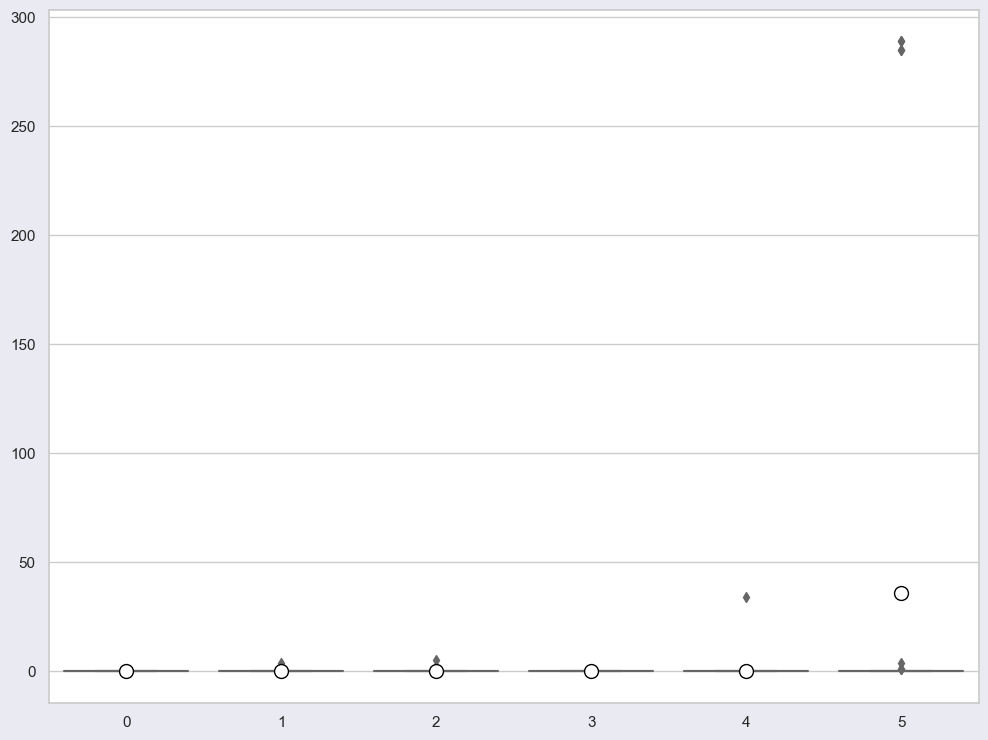

In [109]:
sns.set(style="whitegrid")
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(12, 9), facecolor=facecolor)
sns.boxplot(data=list_livre, palette="Set3",showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
#plt.yscale("log")
ax.set_ylabel('Nombres de correspondances de bigrams de mots dans les textes de Guérin', 
              fontsize=12, color=font_color, **hfont)
custom_labels = ['livre 1','livre 2','livre 3','livre 4','livre 5','livre 6']
plt.xticks(range(len(custom_labels)), custom_labels)
plt.title('Nombre de phrases de Guérin dans lesquelles on retrouve au moins un bigram en commun avec Pierre de la Vigne')

In [111]:
liste_quadrigrams = [sum(livre_1.values()),sum(livre_2.values()),sum(livre_3.values()),
                     sum(livre_4.values()),sum(livre_5.values()),sum(livre_6.values())]

In [112]:
liste_quadrigrams

[0, 4, 7, 0, 35, 1154]

5-grams

In [113]:
guerin_quintigrams = []

for i in list(guerin_2.values()):
    guerin_quintigrams.append(create_quintigrams(i))

In [114]:
pdv_quintigrams = []

for i in list(pdv_2.values()):
    pdv_quintigrams.append(create_quintigrams(i))

In [115]:
for value in tqdm(pdv_quintigrams):
    
    comparaison_quintigrams(value)

100%|███████████████████████████████████████| 2074/2074 [02:05<00:00, 16.53it/s]


In [116]:
un =  substitute_keys(matches_quintigrams,pdv_2)
deux = transform_sentences_to_keys(un,guerin_2)
deux = remove_duplicates_from_dict_values(deux)

In [117]:
count_quintigrams = {}

for key, value in deux.items():
    count_quintigrams[key] = len(value)

In [118]:
count_quintigrams 

{'pdv_337_3': 258, 'pdv_339_2': 258, 'pdv_342_4': 258, 'pdv_356_2': 258}

In [119]:
count_sentences_quintigrams = {}
#nombre de phrases qui ont au moins un bigramme similaire avec une phrase de guérin. 

for i in tqdm(range(363)):
    filtered_dict = {key: value for key, value in count_quintigrams.items() if key.startswith(f"pdv_{i+1}_")}
    count_sentences_quintigrams[f'pdv_{i+1}'] = sum(filtered_dict.values())

100%|█████████████████████████████████████| 363/363 [00:00<00:00, 423278.39it/s]


In [120]:
keys = list(count_sentences_quintigrams.keys())
values = list(count_sentences_quintigrams.values())

livre_1 = {}
livre_2 = {}
livre_3 = {}
livre_4 = {}
livre_5 = {}
livre_6 = {}

for i in range(len(keys)):
    if i < 33:
        livre_1[keys[i]] = values[i]
    if 32 < i < 92:
        livre_2[keys[i]] = values[i]
    if 91 < i < 179:
        livre_3[keys[i]] = values[i]
    if 178 < i < 195:
        livre_4[keys[i]] = values[i]
    if 194 < i < 331:
        livre_5[keys[i]] = values[i]
    if 330 < i < 364:
        livre_6[keys[i]] = values[i]

In [121]:
livre1 = pd.DataFrame(list(livre_1.items()), columns=['Key', 'Value'])
statistics1 = pd.DataFrame(livre1['Value'].describe())

livre2 = pd.DataFrame(list(livre_2.items()), columns=['Key', 'Value'])
statistics2 = pd.DataFrame(livre2['Value'].describe())

livre3 = pd.DataFrame(list(livre_3.items()), columns=['Key', 'Value'])
statistics3 = pd.DataFrame(livre3['Value'].describe())

livre4 = pd.DataFrame(list(livre_4.items()), columns=['Key', 'Value'])
statistics4 = pd.DataFrame(livre4['Value'].describe())

livre5 = pd.DataFrame(list(livre_5.items()), columns=['Key', 'Value'])
statistics5 = pd.DataFrame(livre5['Value'].describe())

livre6 = pd.DataFrame(list(livre_6.items()), columns=['Key', 'Value'])
statistics6 = pd.DataFrame(livre6['Value'].describe())

In [122]:
livre1_array = np.array(livre1['Value'].tolist())
livre2_array = np.array(livre2['Value'].tolist())
livre3_array = np.array(livre3['Value'].tolist())
livre4_array = np.array(livre4['Value'].tolist())
livre5_array = np.array(livre5['Value'].tolist())
livre6_array = np.array(livre6['Value'].tolist())
list_livre = [livre1_array,livre2_array,livre3_array,livre4_array,livre5_array,livre6_array]

In [ ]:
sns.set(style="whitegrid")
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(12, 9), facecolor=facecolor)
sns.boxplot(data=list_livre, palette="Set3",showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
#plt.yscale("log")
ax.set_ylabel('Nombres de correspondances de bigrams de mots dans les textes de Guérin', 
              fontsize=12, color=font_color, **hfont)
custom_labels = ['livre 1','livre 2','livre 3','livre 4','livre 5','livre 6']
plt.xticks(range(len(custom_labels)), custom_labels)
plt.title('Nombre de phrases de Guérin dans lesquelles on retrouve au moins un bigram en commun avec Pierre de la Vigne')

In [123]:
liste_quintigrams = [sum(livre_1.values()),sum(livre_2.values()),sum(livre_3.values()),
                     sum(livre_4.values()),sum(livre_5.values()),sum(livre_6.values())]

In [124]:
data = [liste_bigrams,liste_trigrams,liste_quadrigrams,liste_quintigrams]

columns = ('livre 1', 'livre 2', 'livre 3', 'livre 4', 'livre 5', 'livre 6')

In [127]:
liste_bigrams

[1214, 1641, 2260, 113, 5100, 7645]

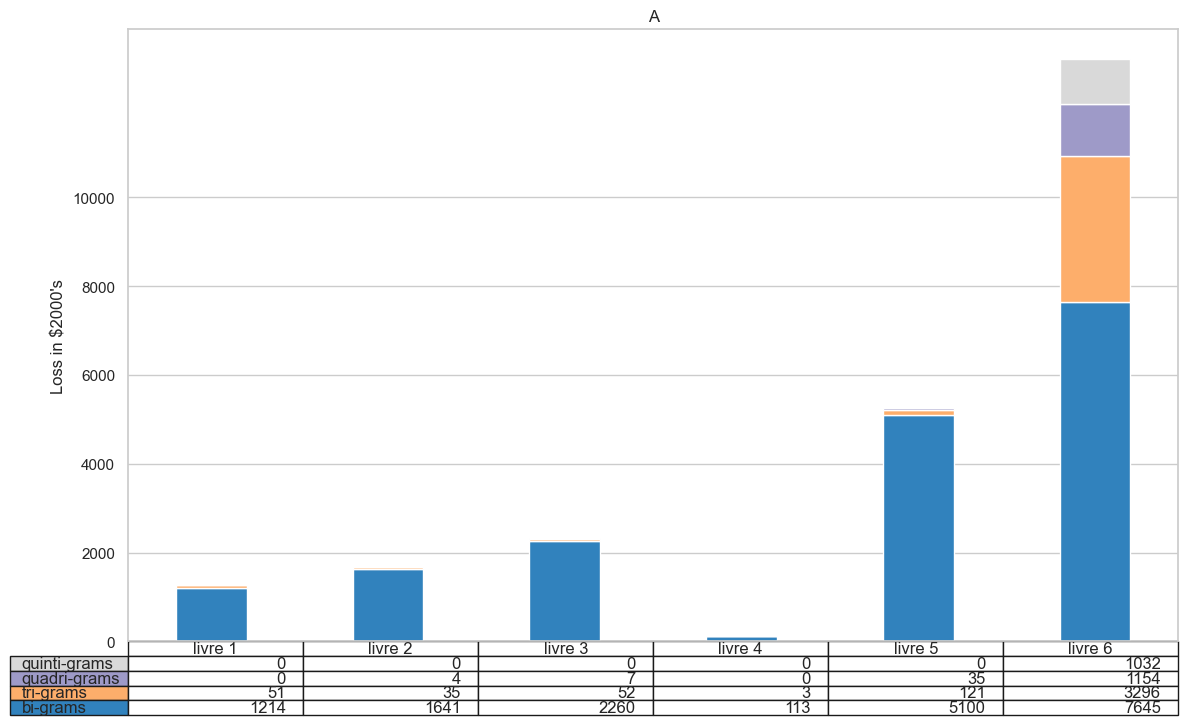

In [125]:
sns.set(style="whitegrid")
facecolor = '#eaeaf2'
data = data

columns = ('livre 1', 'livre 2', 'livre 3', 'livre 4', 'livre 5', 'livre 6')
rows = [x for x in ('quinti-grams', 'quadri-grams', 'tri-grams', 'bi-grams')
]

plt.figure(figsize=(15,9))

values = np.arange(0, 10001, 2000)
value_increment = 2000

# Get some pastel shades for the colors
colors = plt.cm.tab20c(np.linspace(0, 1, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%d' % x for x in data[row]])

# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel(f"Loss in ${value_increment}'s")

plt.yticks(values, ['%d' % val for val in values])
plt.xticks([])
plt.title('A')


plt.show()
